In [1]:
import pandas as pd
#from source import image_id_converter as img_idc
import matplotlib.pyplot as plt
from PIL import Image
#import numpy as np
#import pandas as pd
import pathlib as pl
from pathlib import Path
import os

In [2]:
import ollama
#import json
#import re

In [3]:
# Get path to current directory: 
project_path = Path.cwd()

# Define path to folder with images: 
image_dir = project_path/'visual_genome_proc_data'  # Replace with your directory containing images


### LLM for image analysis first try:

In [4]:


# For batch processing your images
def analyze_image(image_path, prompt):
    response = ollama.chat(
        # Choose the LLM you want to use: 
        
        #model="minicpm-v",  # or "llava"
        #model="llama3.2-v",
        model="llama3.2-vision:90b",
        messages=[{
            'role': 'user', 
            'content': prompt,
            'images': [image_path]
        }]
    
    )
    return response['message']['content']

# Example prompt: 
prompt = "List the 5 most prominent objects in this image and categorize the image type (photography, map, painting, etc.)"



In [5]:
# Get list of all files in directory
image_files = os.listdir(image_dir)
# Choose an image file: 
image_file_path = image_dir / image_files[3]
image_file_path

PosixPath('/storage/homefs/sh98e089/visual_genome_proc_data/visual_genome_proc_49.jpg')

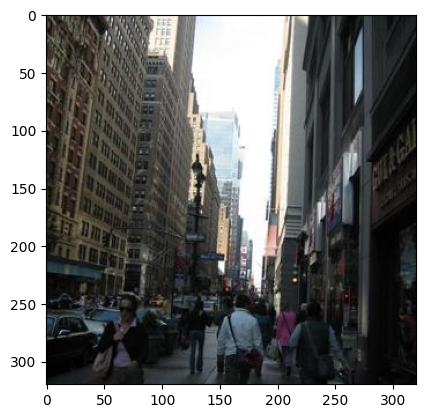

In [6]:
# Show image: 
image = Image.open(image_file_path)
plt.imshow(image)

In [7]:
# Ask the LLM about the image: 
analyze_image(image_file_path, prompt)

'The five most prominent objects in this image are:\n\n1. Buildings: The image features several tall buildings, including skyscrapers and office buildings, which dominate the skyline.\n2. Cars: There are numerous cars visible on the streets, including taxis, buses, and private vehicles.\n3. People: The image shows many people walking on the sidewalks, crossing streets, and engaging in various activities.\n4. Streetlights: Streetlights are visible along the streets, providing illumination for pedestrians and drivers.\n5. Billboards: Several large billboards are displayed on the sides of buildings, advertising various products and services.\n\nThis image is a photograph, likely taken from a high vantage point such as a rooftop or a helicopter, capturing the bustling activity of a major city.'